<a href="https://colab.research.google.com/github/teja1091/BIG_DATA_ANALYSIS/blob/main/Big_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("COVID19 Big Data Analysis").getOrCreate()


In [ ]:
import kagglehub
covid_dataset_path = kagglehub.dataset_download('imdevskp/corona-virus-report')
print('Data source import complete.')


100%|██████████| 19.0M/19.0M [00:00<00:00, 222MB/s]

Extracting files...


Data source import complete.


In [ ]:
import os

csv_path = os.path.join(covid_dataset_path, 'worldometer_data.csv')


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("COVID19 Big Data Analysis").getOrCreate()

df = spark.read.csv(csv_path, header=True, inferSchema=True)
df.show(5)           # Preview first 5 rows
df.printSchema()     # Check column types


+--------------+-------------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+--------------+
|Country/Region|    Continent|Population|TotalCases|NewCases|TotalDeaths|NewDeaths|TotalRecovered|NewRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|    WHO Region|
+--------------+-------------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+--------------+
|           USA|North America| 331198130|   5032179|    NULL|     162804|     NULL|       2576668|        NULL|    2292707|           18296|           15194|        492.0|  63139605|      190640|      Americas|
|        Brazil|South America| 212710692|   2917562|    NULL|      98644|     NULL|       2047660|        NULL|     771258|            8318|           13716

In [ ]:
from pyspark.sql import functions as F

# Number of rows and columns
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

# Show column names
print(df.columns)

# Count missing values per column
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()


Rows: 209, Columns: 16
['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']
+--------------+---------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|NewCases|TotalDeaths|NewDeaths|TotalRecovered|NewRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        1|         1|         0|     205|         21|      206|             4|         206|          4

In [ ]:
top_cases = df.orderBy(F.desc('TotalCases')) \
              .select('Country/Region', 'TotalCases', 'TotalDeaths', 'TotalRecovered') \
              .limit(10)

top_cases.show()


+--------------+----------+-----------+--------------+
|Country/Region|TotalCases|TotalDeaths|TotalRecovered|
+--------------+----------+-----------+--------------+
|           USA|   5032179|     162804|       2576668|
|        Brazil|   2917562|      98644|       2047660|
|         India|   2025409|      41638|       1377384|
|        Russia|    871894|      14606|        676357|
|  South Africa|    538184|       9604|        387316|
|        Mexico|    462690|      50517|        308848|
|          Peru|    455409|      20424|        310337|
|         Chile|    366671|       9889|        340168|
|      Colombia|    357710|      11939|        192355|
|         Spain|    354530|      28500|          NULL|
+--------------+----------+-----------+--------------+



In [ ]:
from pyspark.sql import functions as F

# Add MortalityRate column
df = df.withColumn('MortalityRate', (F.col('TotalDeaths') / F.col('TotalCases')) * 100)

# Show top 10 countries by MortalityRate
df.select('Country/Region', 'MortalityRate') \
  .orderBy(F.desc('MortalityRate')) \
  .show(10)


+--------------+------------------+
|Country/Region|     MortalityRate|
+--------------+------------------+
|         Yemen|28.733031674208142|
|        France|15.494318443207433|
|            UK| 15.06260263391901|
|         Italy|14.119757307266337|
|       Belgium|13.855083054610867|
|       Hungary|13.051990428540353|
|        Mexico|10.918109317253451|
|   Netherlands|10.798146783194692|
|  Sint Maarten|              10.0|
|Western Sahara|              10.0|
+--------------+------------------+
only showing top 10 rows



In [ ]:
from pyspark.sql import functions as F

# Add RecoveryRate column
df = df.withColumn('RecoveryRate', (F.col('TotalRecovered') / F.col('TotalCases')) * 100)

# Show top 10 countries by RecoveryRate
df.select('Country/Region', 'RecoveryRate') \
  .orderBy(F.desc('RecoveryRate')) \
  .show(10)


+----------------+-----------------+
|  Country/Region|     RecoveryRate|
+----------------+-----------------+
|           Macao|            100.0|
|   New Caledonia|            100.0|
|        Dominica|            100.0|
|       Greenland|            100.0|
|Falkland Islands|            100.0|
|    Vatican City|            100.0|
|  Cayman Islands|99.50738916256158|
|      Seychelles| 98.4126984126984|
|         Brunei |97.87234042553192|
|     New Zealand|  97.131931166348|
+----------------+-----------------+
only showing top 10 rows



In [ ]:
from pyspark.sql import functions as F

top_cases = df.orderBy(F.desc('TotalCases')) \
              .select('Country/Region', 'TotalCases', 'TotalDeaths', 'TotalRecovered') \
              .limit(10)

top_cases.show()


top_cases_pd = top_cases.toPandas()

+--------------+----------+-----------+--------------+
|Country/Region|TotalCases|TotalDeaths|TotalRecovered|
+--------------+----------+-----------+--------------+
|           USA|   5032179|     162804|       2576668|
|        Brazil|   2917562|      98644|       2047660|
|         India|   2025409|      41638|       1377384|
|        Russia|    871894|      14606|        676357|
|  South Africa|    538184|       9604|        387316|
|        Mexico|    462690|      50517|        308848|
|          Peru|    455409|      20424|        310337|
|         Chile|    366671|       9889|        340168|
|      Colombia|    357710|      11939|        192355|
|         Spain|    354530|      28500|          NULL|
+--------------+----------+-----------+--------------+



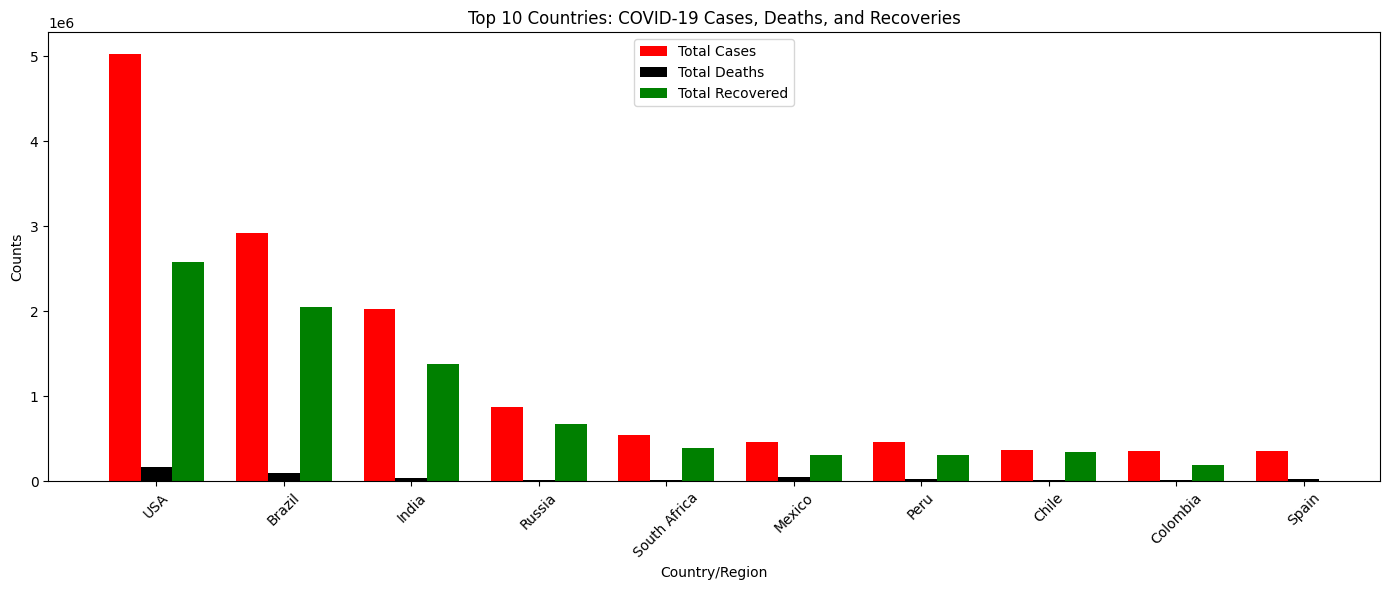

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# X-axis labels
countries = top_cases_pd['Country/Region']
x = np.arange(len(countries))

# Values
total_cases = top_cases_pd['TotalCases']
total_deaths = top_cases_pd['TotalDeaths']
total_recovered = top_cases_pd['TotalRecovered']

# Plot
width = 0.25
plt.figure(figsize=(14,6))

plt.bar(x - width, total_cases, width=width, label='Total Cases', color='red')
plt.bar(x, total_deaths, width=width, label='Total Deaths', color='black')
plt.bar(x + width, total_recovered, width=width, label='Total Recovered', color='green')

plt.xlabel('Country/Region')
plt.ylabel('Counts')
plt.title('Top 10 Countries: COVID-19 Cases, Deaths, and Recoveries')
plt.xticks(x, countries, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save cleaned dataset to CSV
df.write.csv('worldometer_cleaned.csv', header=True, mode='overwrite')
